In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import math
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Preprocessing de la base de donnée

In [2]:
# Importation de la base de données
df = pd.read_csv("data/bases.csv", sep=';')
df.head()

,CODGEO,PMIMP,DECUC_Q2,DECUC_Q1,DECUC_Q3,BREV,DECUC_D1,DECUC_D9,DECUC_D1D9,DISP_Q2,...,PPAT,NOTE_FILO,C,CC2S,NOTE_CNAM,A,APPA,ARSAS,AAAH,NOTE_CNAF
0,QP001001,"24,3",10580,5780,17070,"58,6",1620,23220,"14,3",13790,...,"4,1",0,5838.0,1426.0,0.0,1991.0,714.0,341.0,227.0,0.0
1,QP001002,"13,5",8990,4950,13790,"70,8",1030,18520,"17,9",12850,...,"2,4",0,1777.0,406.0,0.0,726.0,227.0,144.0,104.0,0.0
2,QP001003,26,12460,6350,21070,51,0,32310,NaN,15680,...,"3,3",0,NaN,NaN,5.0,272.0,81.0,36.0,18.0,0.0
3,QP001004,"25,8",11160,6770,18730,"56,1",3280,27410,"8,3",14480,...,"2,9",0,1139.0,153.0,0.0,299.0,88.0,48.0,22.0,0.0
4,QP001005,"22,3",9270,4420,15420,"66,2",260,21750,"84,8",13000,...,"2,9",0,1555.0,446.0,0.0,531.0,179.0,122.0,58.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODGEO      1352 non-null   object 
 1   PMIMP       1034 non-null   object 
 2   DECUC_Q2    1352 non-null   int64  
 3   DECUC_Q1    1352 non-null   int64  
 4   DECUC_Q3    1352 non-null   int64  
 5   BREV        1338 non-null   object 
 6   DECUC_D1    1352 non-null   int64  
 7   DECUC_D9    1352 non-null   int64  
 8   DECUC_D1D9  876 non-null    object 
 9   DISP_Q2     1352 non-null   int64  
 10  DISP_Q1     1352 non-null   int64  
 11  DISP_Q3     1352 non-null   int64  
 12  TP60        1348 non-null   object 
 13  DISP_D1     1352 non-null   int64  
 14  DISP_D9     1352 non-null   int64  
 15  DISP_D1D9   1352 non-null   object 
 16  PACT        1352 non-null   object 
 17  PPEN        1352 non-null   object 
 18  PPSOC       1352 non-null   object 
 19  PIMPOT      1352 non-null  

In [4]:
df.describe()

,DECUC_Q2,DECUC_Q1,DECUC_Q3,DECUC_D1,DECUC_D9,DISP_Q2,DISP_Q1,DISP_Q3,DISP_D1,DISP_D9,NOTE_FILO,C,CC2S,NOTE_CNAM,A,APPA,ARSAS,AAAH,NOTE_CNAF
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1317.000000,1317.000000,1345.000000,1318.000000,1318.000000,1318.000000,1318.000000,1345.000000
mean,9962.877219,4740.051775,16324.963018,1076.715976,22861.213018,13616.701183,10559.068047,17794.445266,8383.047337,22667.744083,0.014053,3627.687927,1013.074412,0.104089,1218.921851,388.536419,312.964340,136.684370,0.098885
std,2132.637971,1999.959159,2634.786561,1370.146064,3652.436317,1138.270692,817.415375,1763.460401,691.281780,2768.278547,0.117754,6382.082164,1872.856417,0.714136,2046.783755,616.344097,581.672471,203.044356,0.693211
min,2590.000000,0.000000,6170.000000,0.000000,8320.000000,9620.000000,5900.000000,12140.000000,3940.000000,15460.000000,0.000000,175.000000,28.000000,0.000000,174.000000,31.000000,8.000000,5.000000,0.000000
25%,8540.000000,3420.000000,14710.000000,0.000000,20485.000000,12820.000000,10010.000000,16590.000000,8020.000000,20807.500000,0.000000,1279.000000,333.000000,0.000000,448.000000,148.000000,103.000000,51.000000,0.000000
50%,10050.000000,4810.000000,16275.000000,430.000000,22400.000000,13600.000000,10530.000000,17620.000000,8430.000000,22210.000000,0.000000,1945.000000,547.000000,0.000000,702.500000,230.000000,174.000000,83.000000,0.000000
75%,11420.000000,6142.500000,17952.500000,1862.500000,24865.000000,14360.000000,11110.000000,18900.000000,8820.000000,24160.000000,0.000000,3493.000000,1010.000000,0.000000,1254.750000,414.750000,318.000000,151.000000,0.000000
max,18260.000000,12260.000000,28810.000000,7670.000000,44160.000000,18980.000000,14410.000000,27080.000000,11730.000000,39370.000000,1.000000,118695.000000,35662.000000,5.000000,38885.000000,11114.000000,11501.000000,3379.000000,5.000000


#### Selection de la variable d'interet et analyse descriptive

In [5]:
# Sélection des variables d'intérêt
vars_interet = ["DISP_Q2"]
# Suppression des valeurs manquantes
df_clean = df[vars_interet].dropna()

In [6]:
stats = pd.DataFrame({
    "Statistique": [
        "Nombre d'observations",
        "Moyenne",
        "Médiane",
        "Écart-type",
        "Variance",
        "Minimum",
        "1er quartile",
        "3e quartile",
        "Maximum"
    ],
    "Valeur": [
        df_clean["DISP_Q2"].count(),
        df_clean["DISP_Q2"].mean(),
        df_clean["DISP_Q2"].median(),
        df_clean["DISP_Q2"].std(),
        df_clean["DISP_Q2"].var(),
        df_clean["DISP_Q2"].min(),
        df_clean["DISP_Q2"].quantile(0.25),
        df_clean["DISP_Q2"].quantile(0.75),
        df_clean["DISP_Q2"].max()
    ]
})
stats
#print(stats.to_latex(index=False, float_format="%.2f"))

,Statistique,Valeur
0,Nombre d'observations,1.352000e+03
1,Moyenne,1.361670e+04
2,Médiane,1.360000e+04
3,Écart-type,1.138271e+03
4,Variance,1.295660e+06
5,Minimum,9.620000e+03
6,1er quartile,1.282000e+04
7,3e quartile,1.436000e+04
8,Maximum,1.898000e+04


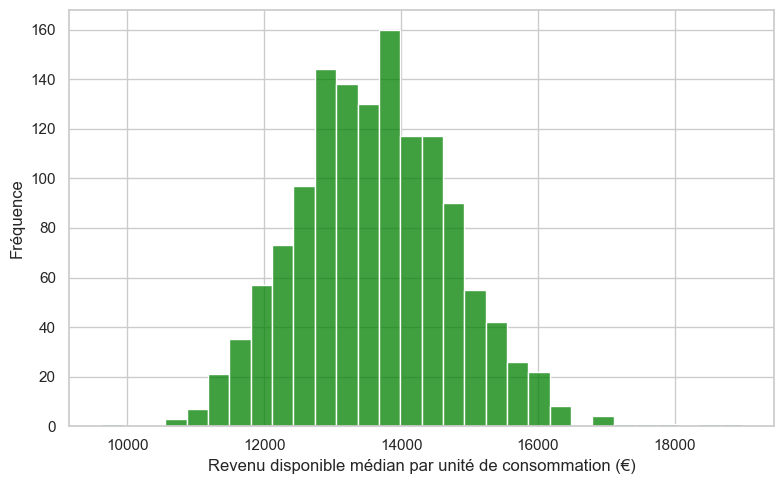

In [7]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(data=df_clean,x="DISP_Q2",bins=30,
    #kde=True,
    color="green",)
plt.xlabel("Revenu disponible médian par unité de consommation (€)")
plt.ylabel("Fréquence")
#plt.title("Distribution du revenu disponible médian (DISP_Q2)")
plt.tight_layout()
plt.show()

Test de normalité 

In [18]:
shapiro_test = scipy.stats.shapiro(df_clean["DISP_Q2"])
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

Shapiro-Wilk test statistic: 0.9941751628326408, p-value: 3.904122679653268e-05


Transormation de la variable en lognormale 

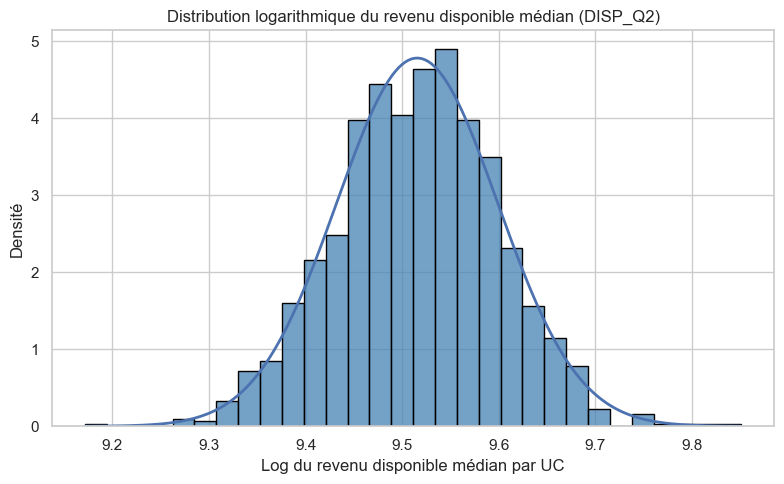

In [9]:
# Transformation logarithmique
df_clean['log_DISP_Q2'] = df_clean['DISP_Q2'].apply(lambda x: math.log(x))
# Nouvelle analyse après transformation
mu, sigma = norm.fit(df_clean["log_DISP_Q2"])
# Graphique
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["log_DISP_Q2"], bins=30, stat="density", color="steelblue", edgecolor="black")
x = np.linspace(df_clean["log_DISP_Q2"].min(), df_clean["log_DISP_Q2"].max(), 200)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2)
plt.xlabel("Log du revenu disponible médian par UC")
plt.ylabel("Densité")
plt.title("Distribution logarithmique du revenu disponible médian (DISP_Q2)")
plt.tight_layout()
plt.show()

In [20]:
shapiro_test = scipy.stats.shapiro(df_clean['log_DISP_Q2'])
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

Shapiro-Wilk test statistic: 0.9983064626297872, p-value: 0.1965441524698607


#### **Tiage aléatoire de taille 500**

In [10]:
log_disp_q2= df_clean['log_DISP_Q2']
# Taille de la population
N = len(log_disp_q2)
print(f"Taille de la population (N) : {N}")
# Taille de l'échantillon
n = 700
print(f"Taille de l'échantillon (n) : {n}")
# Tirage d'un échantillon aléatoire de taille n
x = log_disp_q2.sample(n=n, random_state=42)
print("Échantillon aléatoire de log(DISP_Q2) :")
print(x.head())

Taille de la population (N) : 1352
Taille de l'échantillon (n) : 700
Échantillon aléatoire de log(DISP_Q2) :
49      9.486456
638     9.467305
1032    9.411647
746     9.520762
917     9.526610
Name: log_DISP_Q2, dtype: float64


In [11]:
# Moyenne et variance "théoriques"
mu_theorique = log_disp_q2.mean()
var_theorique = log_disp_q2.var()
print(f"Moyenne théorique : {mu_theorique}")
print(f"Variance théorique : {var_theorique}")

Moyenne théorique : 9.515575325341509
Variance théorique : 0.006958931466199742


#### **Estimations des paramètres et Analyse des propriétés des estimateurs**

##### Estimateur du Maximum de vraisemblance / Méthode des moments

In [12]:
mu_hat = x.mean()
sigma2_hat = ((x - mu_hat)**2).mean()
print(f"Estimateur EMV de mu : {mu_hat:.4f}")
print(f"Estimateur EMV de sigma^2 : {sigma2_hat:.4f}")

Estimateur EMV de mu : 9.5162
Estimateur EMV de sigma^2 : 0.0070


##### Biais

In [13]:
# Biais de l'estimateur de la moyenne
biais_mu = mu_hat - mu_theorique
print(f"Biais de l'estimateur de la moyenne : {biais_mu:.6f}")
# Biais théorique de l'estimateur de la variance MLE
biais_var = -sigma2_hat/n
print(f"Biais de l'estimateur de la variance : {biais_var:.6f}")
# Correction du biais pour la variance
sigma2_hat_corrige = sigma2_hat * n / (n - 1)
print(f"Estimateur corrigé de la variance : {sigma2_hat_corrige:.6f}")
# Biais corrigé de la variance
biais_var_corrige = sigma2_hat_corrige - var_theorique
print(f"Biais corrigé de l'estimateur de la variance : {biais_var_corrige:.6f}")

Biais de l'estimateur de la moyenne : 0.000601
Biais de l'estimateur de la variance : -0.000010
Estimateur corrigé de la variance : 0.007058
Biais corrigé de l'estimateur de la variance : 0.000099


##### EQM

In [14]:
# EQM de l'estimateur de la moyenne
var_mu_hat = sigma2_hat / n
eqm_mu = var_mu_hat + biais_mu**2
print(f"Variance de l'estimateur de la moyenne : {var_mu_hat:.5f}")
print(f"EQM de l'estimateur de la moyenne : {eqm_mu:.5f}")

Variance de l'estimateur de la moyenne : 0.00001
EQM de l'estimateur de la moyenne : 0.00001


In [15]:
# Variance théorique de l'estimateur de la variance (EMV)
var_sigma2_hat = 2 * (sigma2_hat**2) / n
# EQM de l'estimateur EMV de la variance
eqm_sigma2 = var_sigma2_hat + biais_var**2
print(f"Variance de l'estimateur de la variance : {var_sigma2_hat:.5f}")
print(f"EQM de l'estimateur EMV de la variance : {eqm_sigma2:.5f}")

Variance de l'estimateur de la variance : 0.00000
EQM de l'estimateur EMV de la variance : 0.00000


#### **Convergence: Forte, loi et probabilité**

##### Consistance forte

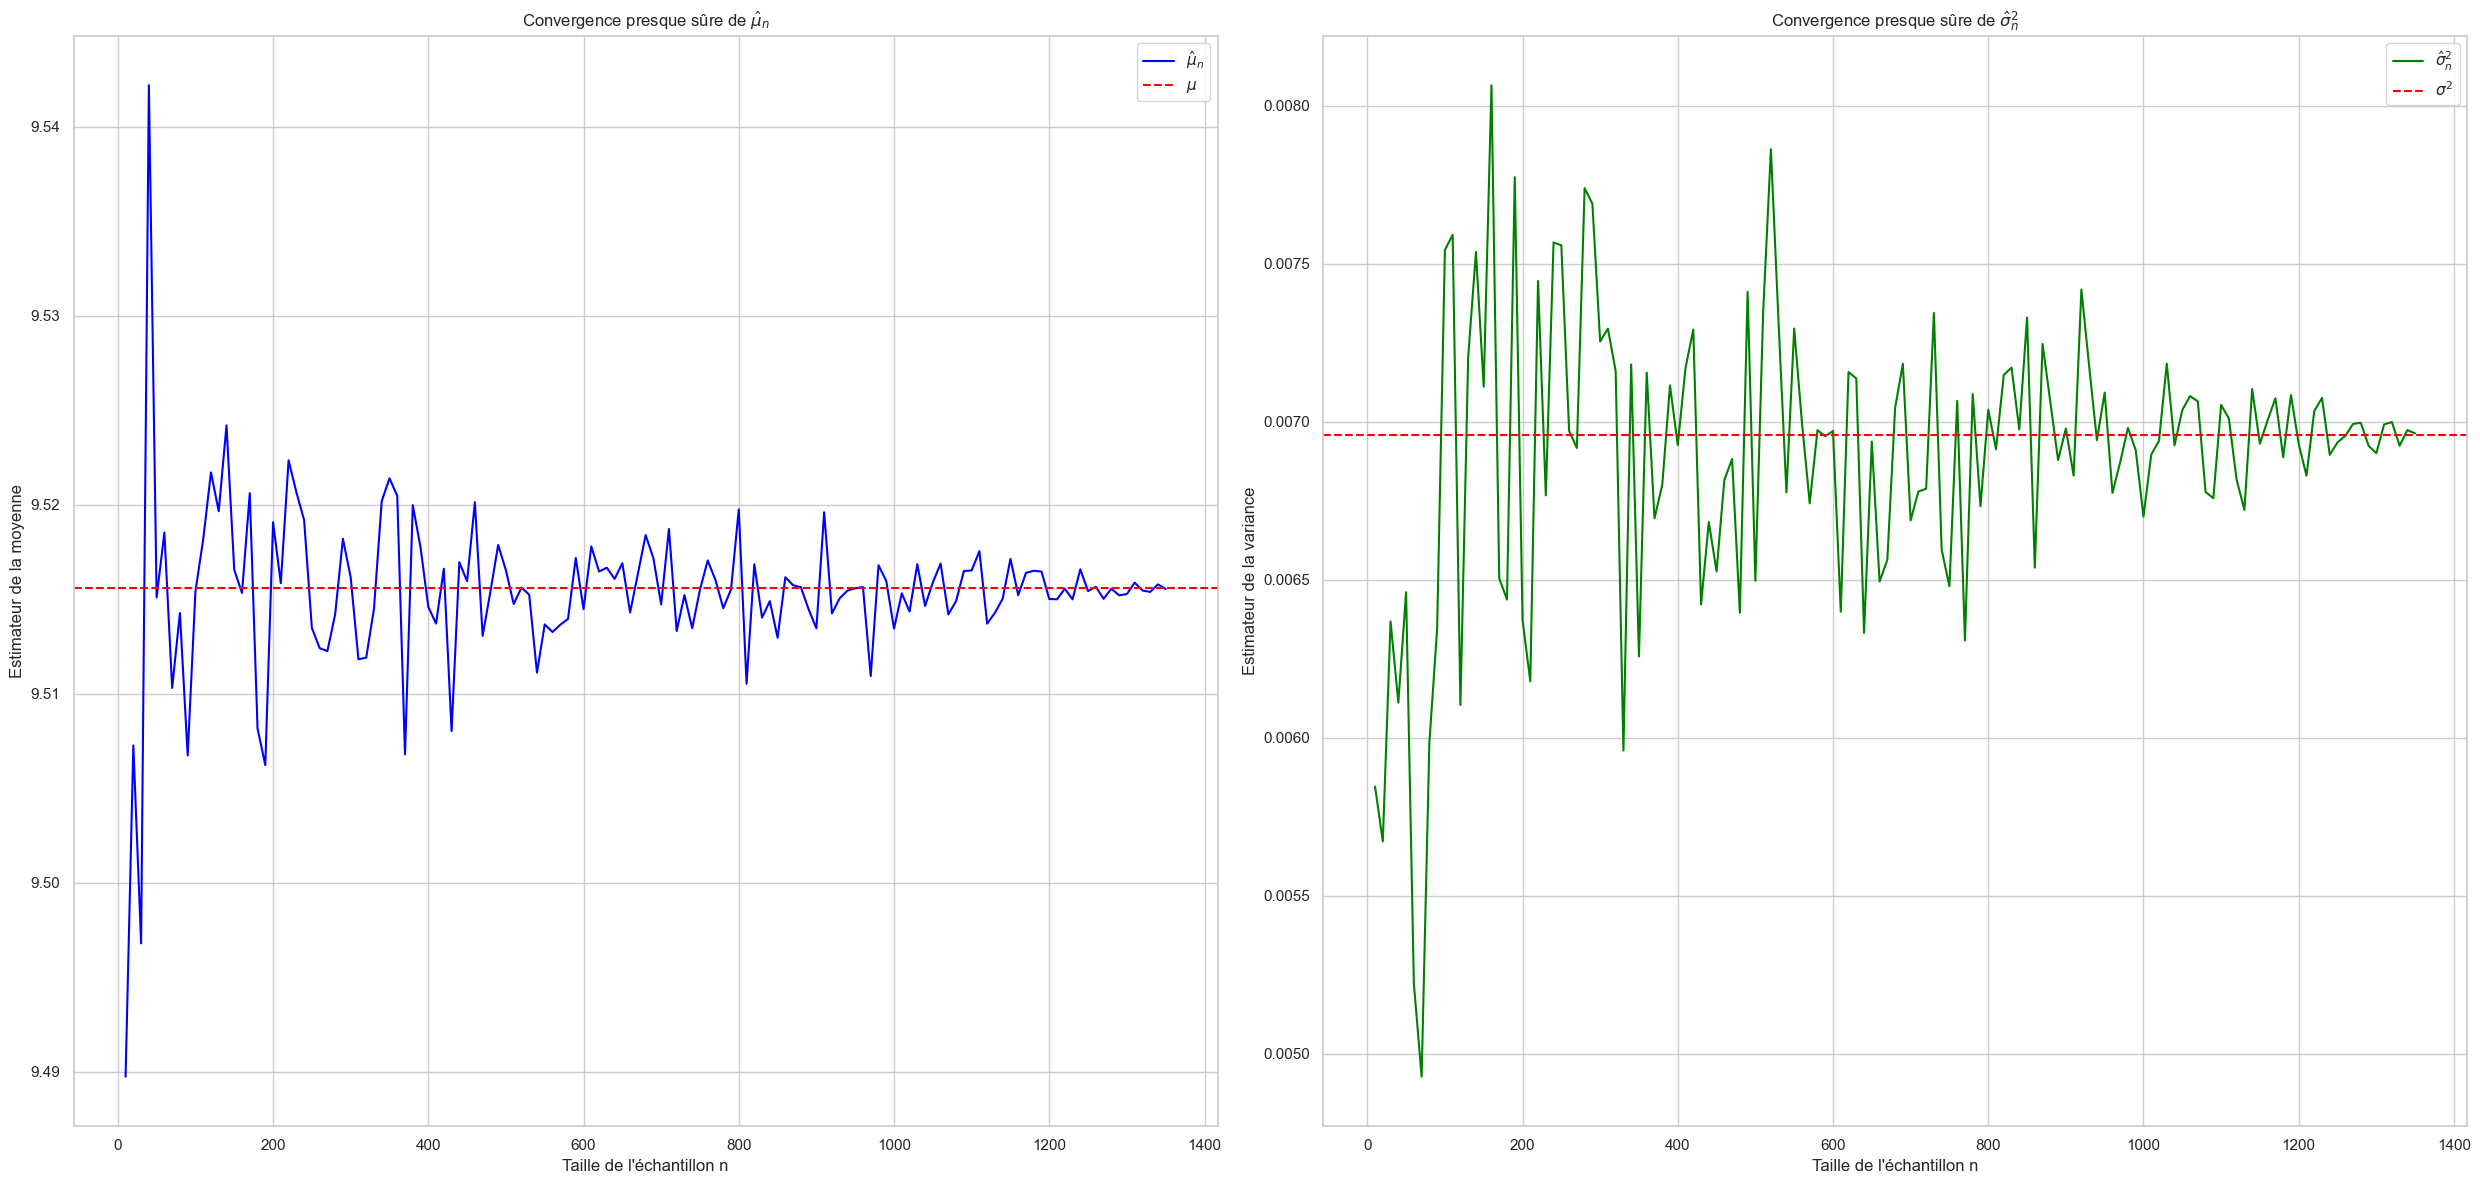

In [16]:
# Tailles d'échantillon croissantes
n_values = np.arange(10, len(df_clean["log_DISP_Q2"]), 10)
# Stockage des estimateurs
mu_hats = []
sigma2_hats = []
for n in n_values:
    sample = np.random.choice(df_clean["log_DISP_Q2"], size=n, replace=False)
    mu_hats.append(sample.mean())
    sigma2_hats.append(sample.var())
plt.figure(figsize=(25, 12))
# Estimateur de la moyenne
plt.subplot(1, 2, 1)
plt.plot(n_values, mu_hats, label=r"$\hat{\mu}_n$", color="blue")
plt.axhline(mu_theorique, color="red", linestyle="--", label=r"$\mu$")
plt.xlabel("Taille de l'échantillon n")
plt.ylabel("Estimateur de la moyenne")
plt.title("Convergence presque sûre de $\hat{\mu}_n$")
plt.legend()

# Estimateur de la variance
plt.subplot(1, 2, 2)
plt.plot(n_values, sigma2_hats, label=r"$\hat{\sigma}^2_n$", color="green")
plt.axhline(var_theorique, color="red", linestyle="--", label=r"$\sigma^2$")
plt.xlabel("Taille de l'échantillon n")
plt.ylabel("Estimateur de la variance")
plt.title("Convergence presque sûre de $\hat{\sigma}^2_n$")
plt.legend()

plt.tight_layout()
plt.show()


##### Convergence en Loi : TCL

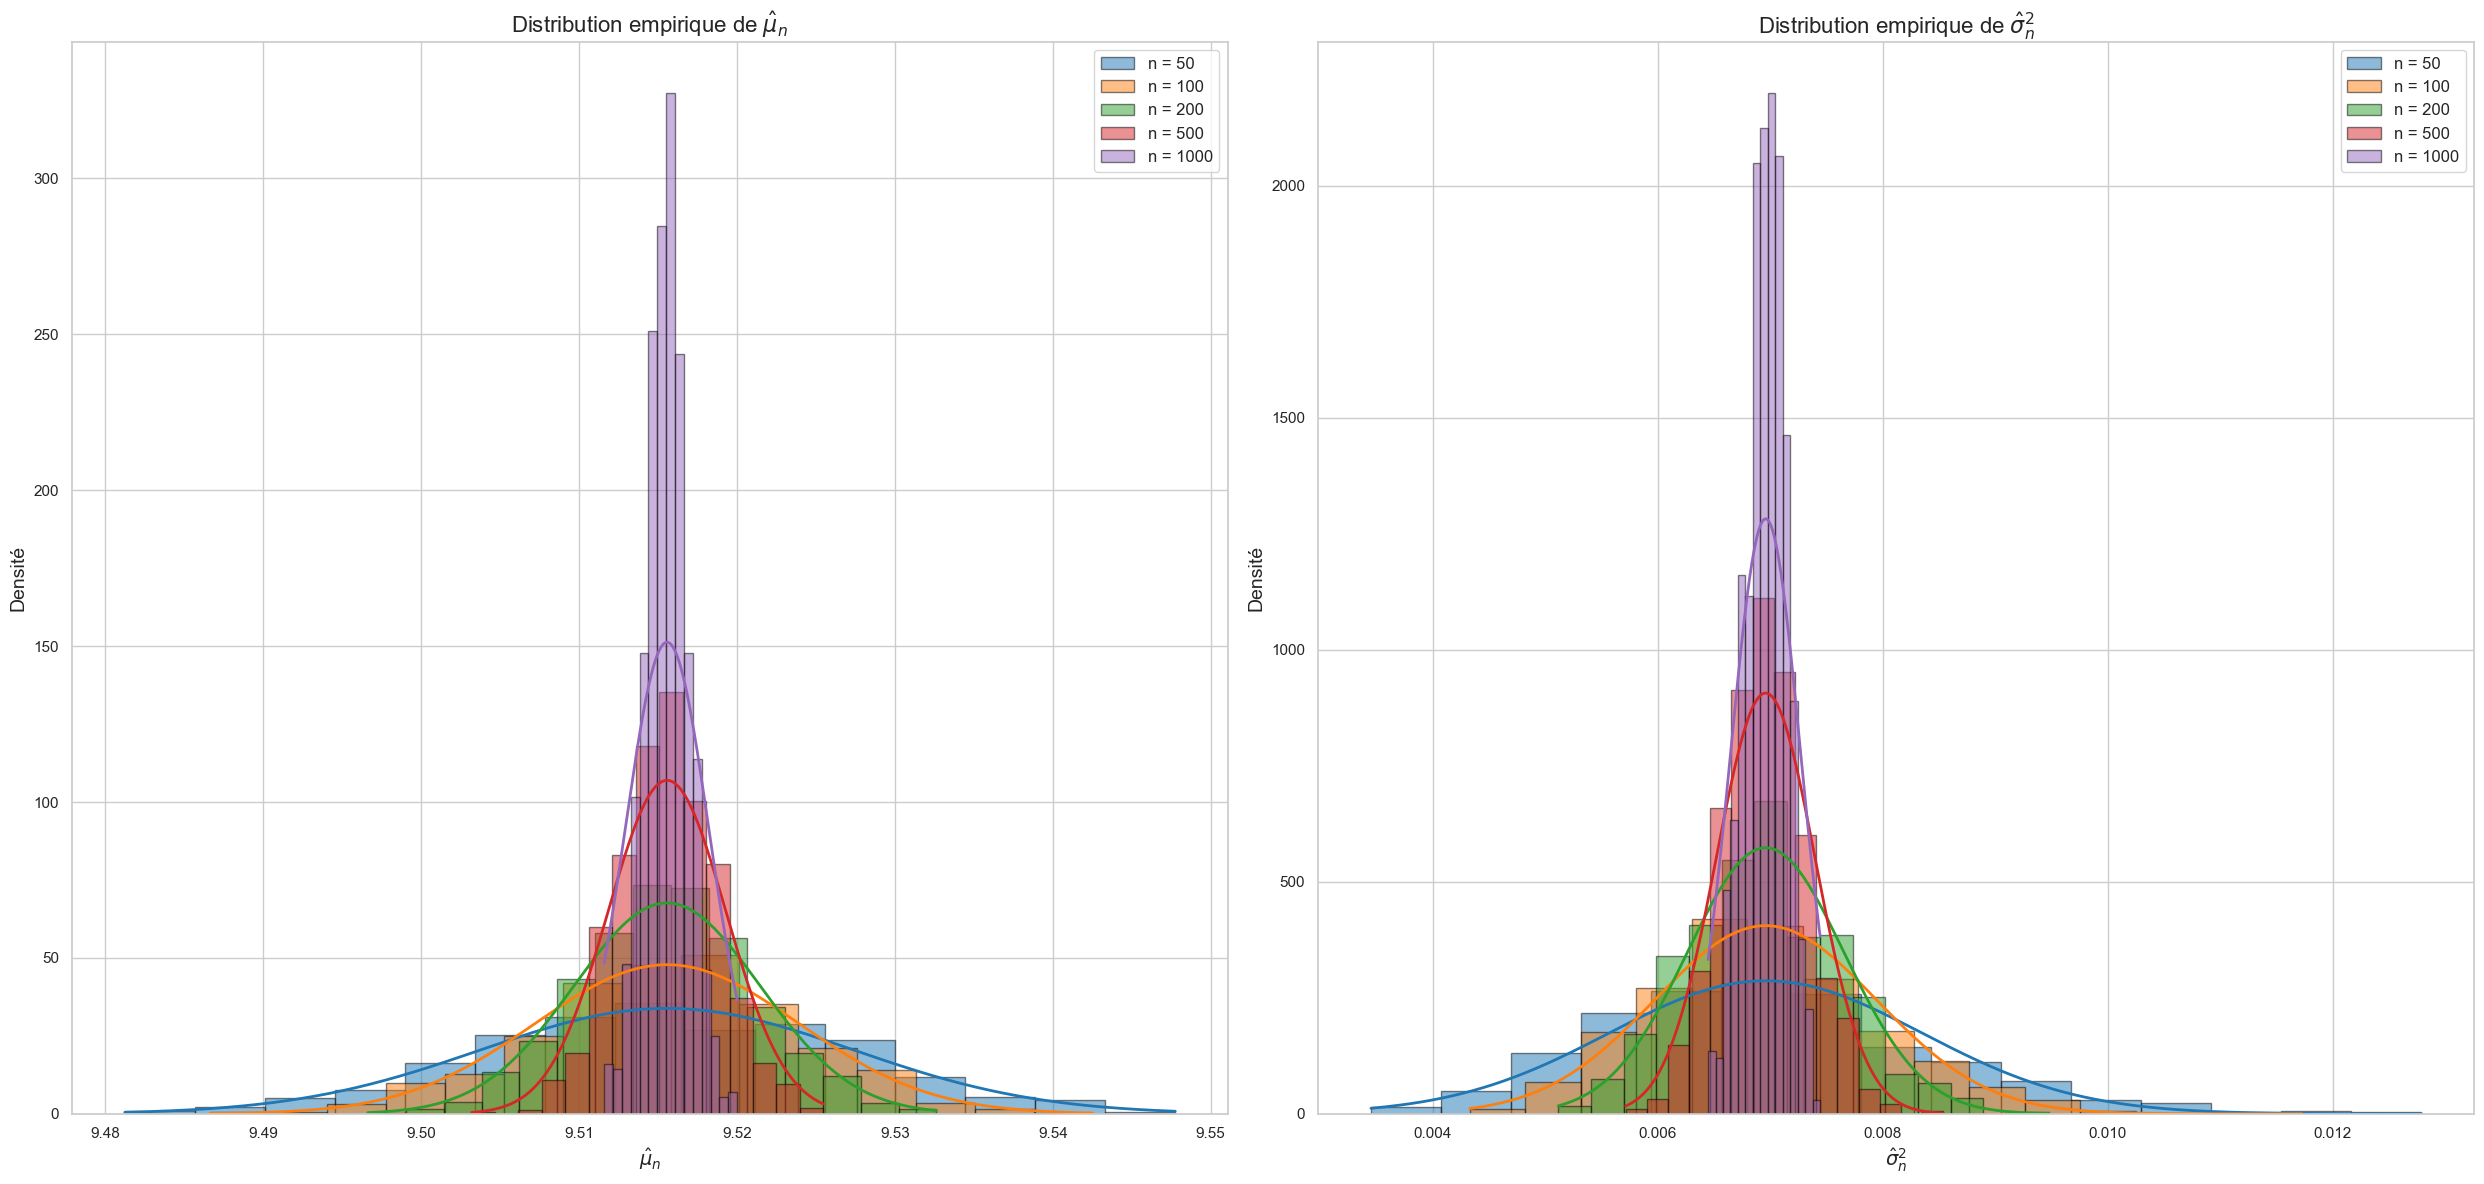

In [17]:
sample_sizes = [50, 100, 200, 500, 1000]
num_simulations = 1000
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

mu_simulations = {n: [] for n in sample_sizes}
var_simulations = {n: [] for n in sample_sizes}

# Simulations
for n in sample_sizes:
    for _ in range(num_simulations):
        sample = df_clean["log_DISP_Q2"].sample(n, replace=False)
        mu_hat = sample.mean()
        var_hat = sample.var(ddof=1)
        mu_simulations[n].append(mu_hat)
        var_simulations[n].append(var_hat)

fig, axes = plt.subplots(1, 2, figsize=(25, 12))

# Histogrammes pour la moyenne
for i, n in enumerate(sample_sizes):
    data = mu_simulations[n]
    axes[0].hist(data, bins=15, density=True, alpha=0.5, color=colors[i], edgecolor='black', label=f"n = {n}")  
    
    x_vals = np.linspace(min(data), max(data), 300)
    pdf = norm.pdf(x_vals, mu_theorique, np.sqrt(var_theorique/n))
    axes[0].plot(x_vals, pdf, color=colors[i], lw=2)

axes[0].set_title(r"Distribution empirique de $\hat{\mu}_n$", fontsize=16)
axes[0].set_xlabel(r"$\hat{\mu}_n$", fontsize=14)
axes[0].set_ylabel("Densité", fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True)

# Histogrammes pour la variance
for i, n in enumerate(sample_sizes):
    data = var_simulations[n]
    axes[1].hist(data, bins=15, density=True, alpha=0.5, color=colors[i], edgecolor='black', label=f"n = {n}")
    
    x_vals = np.linspace(min(data), max(data), 300)
    pdf = norm.pdf(x_vals, var_theorique, np.sqrt(2*var_theorique**2/n))
    axes[1].plot(x_vals, pdf, color=colors[i], lw=2)

axes[1].set_title(r"Distribution empirique de $\hat{\sigma}^2_n$", fontsize=16)
axes[1].set_xlabel(r"$\hat{\sigma}^2_n$", fontsize=14)
axes[1].set_ylabel("Densité", fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()
